In [60]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import os

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

ImportError: No module named statsmodels.formula.api

In [7]:
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    adjust_yaxis(ax2,(y1-y2)/2,v2)
    adjust_yaxis(ax1,(y2-y1)/2,v1)

def adjust_yaxis(ax,ydif,v):
    """shift axis ax by ydiff, maintaining point v at the same location"""
    inv = ax.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, ydif))
    miny, maxy = ax.get_ylim()
    miny, maxy = miny - v, maxy - v
    if -miny>maxy or (-miny==maxy and dy > 0):
        nminy = miny
        nmaxy = miny*(maxy+dy)/(miny+dy)
    else:
        nmaxy = maxy
        nminy = maxy*(miny+dy)/(maxy+dy)
    ax.set_ylim(nminy+v, nmaxy+v)

In [8]:
file1=os.path.expanduser('~/Documents/log/2019-01-14T17-46-15/logstream_ActAdapEsc.bin')
#file2=os.path.expanduser('~/Documents/log/2019-01-08T15-00-00/logstream_ActAdapEsc.bin')

In [9]:
dt = np.dtype([('idx', '>u1'),
               ('cmdSec', '>u4'), ('cmdUsec', '>u4'), ('cmd', '>u4'), ('cmdVel', '>f8'),
               ('fbSec', '>u4'), ('fbUsec', '>u4'), ('angVel', '>f8'),
               
               ('length', '>u2'),
               ('counts', '>u2'),
               ('voltage', '>u2'),
               ('temperature', '>u2'),
               ('current', '>u2'),
               ('id', 'u1')])

In [10]:
data1 = np.fromfile(file1, dtype=dt)
df1 = pd.DataFrame(data1.byteswap().newbyteorder())

#data2 = np.fromfile(file2, dtype=dt)
#df2 = pd.DataFrame(data2.byteswap().newbyteorder())

mot0=df1.loc[(df1['idx'] == 0) & (df1['cmd'] <= 800)]
mot1=df1.loc[(df1['idx'] == 1) & (df1['cmd'] <= 800)]
mot2=df1.loc[(df1['idx'] == 2) & (df1['cmd'] <= 800)]
mot3=df1.loc[(df1['idx'] == 3) & (df1['cmd'] <= 800)]

mot0_cmdTime = mot0.cmdSec + mot0.cmdUsec / (1000.0 * 1000.0)
mot1_cmdTime = mot1.cmdSec + mot1.cmdUsec / (1000.0 * 1000.0)
mot2_cmdTime = mot2.cmdSec + mot2.cmdUsec / (1000.0 * 1000.0)
mot3_cmdTime = mot3.cmdSec + mot3.cmdUsec / (1000.0 * 1000.0)

mot0_fbTime = mot0.fbSec + mot0.fbUsec / (1000.0 * 1000.0)
mot1_fbTime = mot1.fbSec + mot1.fbUsec / (1000.0 * 1000.0)
mot2_fbTime = mot2.fbSec + mot2.fbUsec / (1000.0 * 1000.0)
mot3_fbTime = mot3.fbSec + mot3.fbUsec / (1000.0 * 1000.0)

#df1=df1.loc[(df1['id'] == 171) & (df1['idx'] == 0)]
#df2=df2.loc[(df2['id'] == 171) & (df2['idx'] == 0)]

2.61724550845 1097.30361209


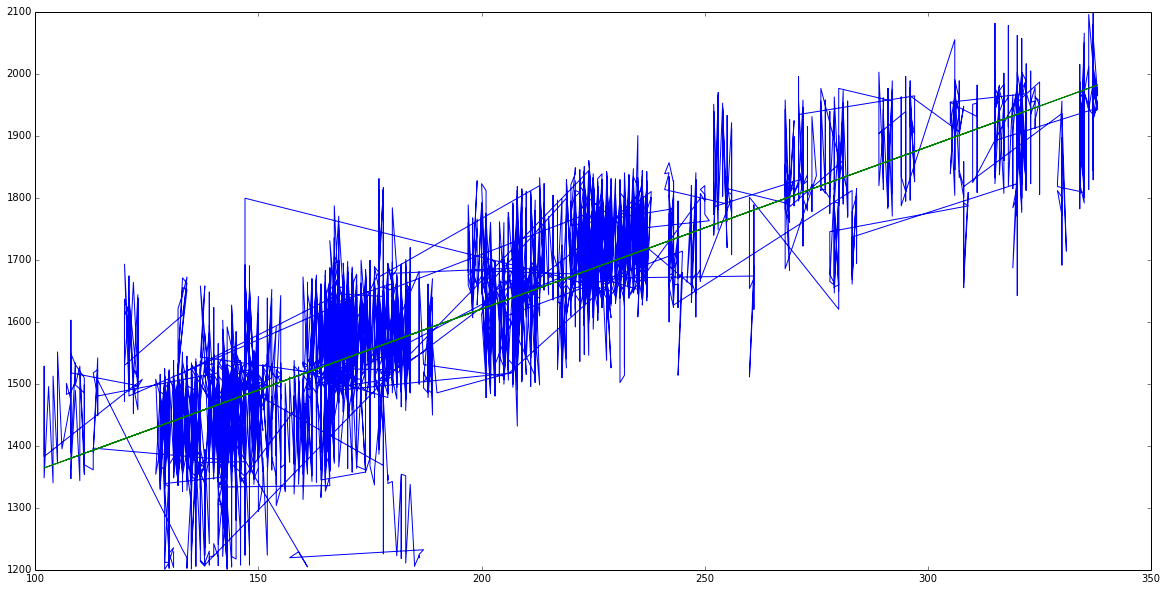

In [66]:
cmd = mot0.cmd[(mot0.cmd > 100) & (mot0.angVel > 1200)].values
angVel = mot0.angVel[(mot0.cmd > 100) & (mot0.angVel > 1200)].values
A = np.vstack([cmd, np.ones(len(cmd))]).T.astype("float64")
m, c = np.linalg.lstsq(A, angVel)[0]
print m, c
plt.plot(cmd, angVel)
plt.plot(cmd, m*cmd + c)

2.99237652118 1006.07121143


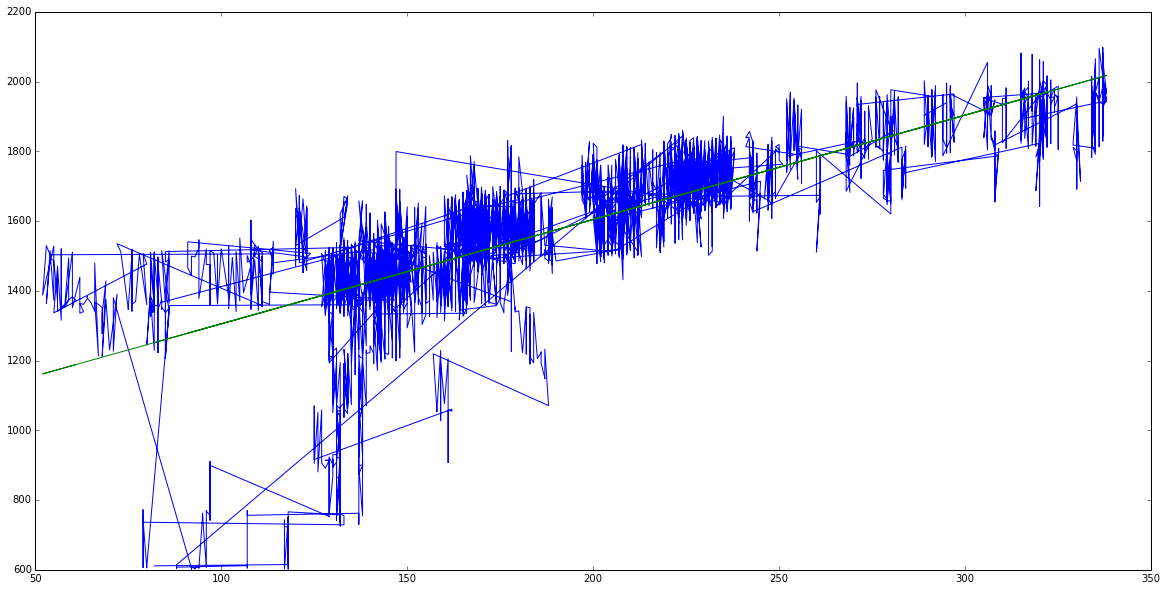

In [87]:
cmd = mot0.cmd[(mot0.cmd > 50) & (mot0.angVel > 600)].values
angVel = mot0.angVel[(mot0.cmd > 50) & (mot0.angVel > 600)].values
A = np.vstack([cmd, np.ones(len(cmd))]).T.astype("float64")
mFull, cFull = np.linalg.lstsq(A, angVel)[0]
print mFull, cFull
plt.plot(cmd, angVel)
plt.plot(cmd, mFull*cmd + cFull)

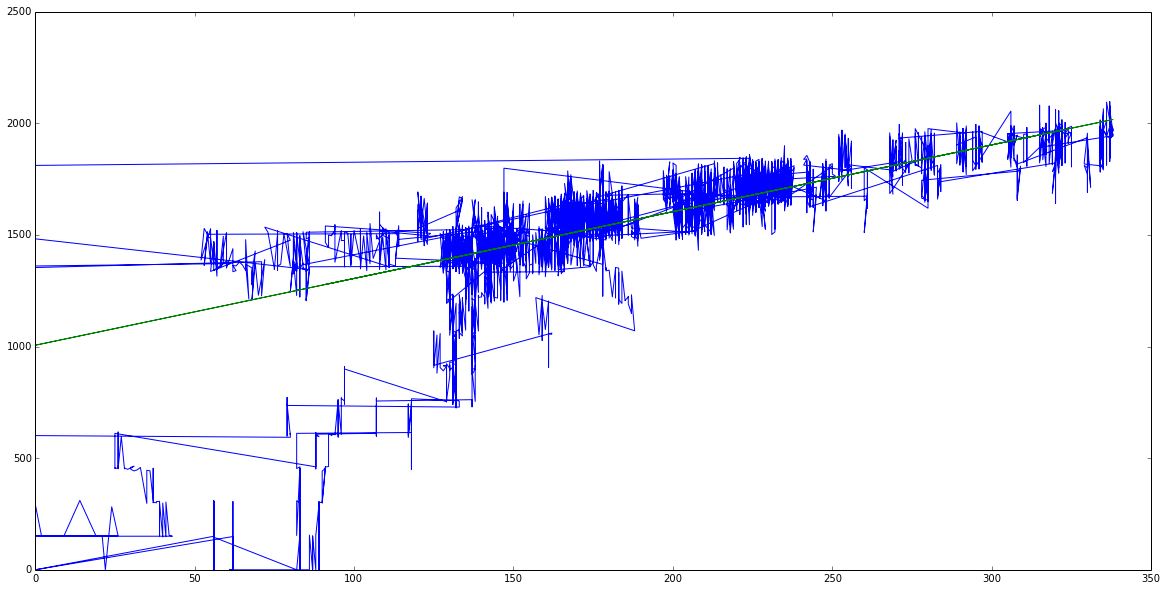

In [88]:
plt.plot(mot0.cmd, mot0.angVel)
plt.plot(mot0.cmd, mFull*mot0.cmd + cFull)

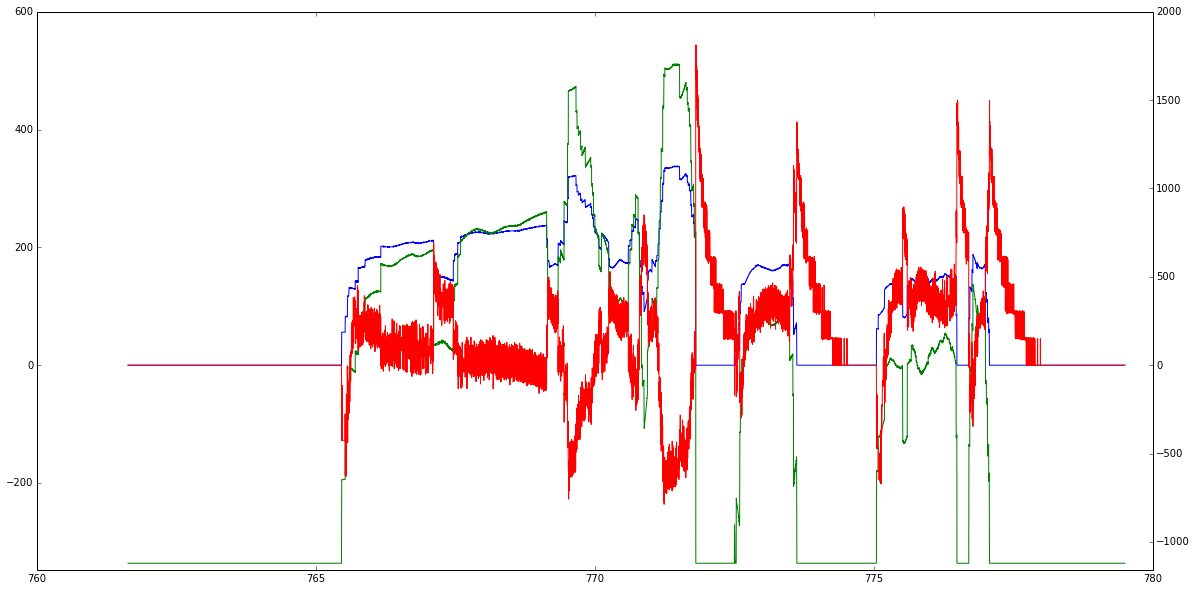

In [92]:
fig, ax1 = plt.subplots()

ax1.plot(mot0_cmdTime, mot0.cmd, 'b')
ax1.plot(mot0_fbTime, (mot0.cmdVel - cFull)/mFull, 'g')

ax2 = ax1.twinx()
ax2.plot(mot0_cmdTime, mot0.angVel - mot0.cmdVel, 'r')

align_yaxis(ax1, 0, ax2, 0)